In [1]:
import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from functions import get_movies_scores, get_infos
from variable_selection_metrics import user_questions, random_questions, loop_simulation, metrics_simulations
from metrics import random_forest, forward_feature_selection, backward_feature_elimination, random_variable_choice, variable_mean_choice

In [2]:
%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
pkl = open('cleaned_movie_data.pkl','rb')
data = pickle.load(pkl)
pkl.close()

In [4]:
data.drop(['occupation', 'gender', 'age'], axis=1, inplace=True)

In [5]:
data.head()

,user,item,rating,release,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3.0,1997,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3.0,1997,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1.0,1994,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2.0,1994,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1.0,1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pkl = open('movie_datas.pkl','rb')
full_data = pickle.load(pkl)
pkl.close()

In [7]:
full_data.head()

,user,item,rating,timestamp,age,gender,occupation,zip,title,release,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3.0,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3.0,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1.0,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2.0,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1.0,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


# Variable selection metrics comparison

- Créer un fichier "metrics" :
    - Contient chacune des différentes métriques à tester
    - Un métrique prends des datas et renvoie une variable
    - Chaque métrique à une option d'affichage

- Créer une fichier "variable_selection_metrics" :
    - Utilise une fonction "metric" qui prend des datas et renvoie la variable la plus importante selon la métrique
    - Possède une fonction "user_question" qui pose une série de questions à l'utilisateur selon la métrique et renvoie une liste de films
    - Possède une fonction "random_question" qui répond automatiquement à une série de questions et renvoie une liste de films
    - Possède une fonction "loop_simulation" qui effectue un nombre donné de "random_quesion" et renvoie le tableau d'occurence des résultats ainsi que le temps moyen passé pour chaque simulation

- Créer plusieurs fonctions de mesure : affichage de la répartition des résultats, temps passé aux calculs, nombre de questions moyen

- Faire tourner les différentes mesures sur différentes métriques

In [8]:
# user_result = user_questions(data, random_forest)

In [9]:
# random_result = random_questions(data, random_forest)

In [10]:
# get_movies_scores(user_result)

In [11]:
# forest_result, question_count = loop_simulation(data, random_forest, loop=5, display = False)

In [12]:
metric_list = [random_forest, forward_feature_selection, random_variable_choice, variable_mean_choice]
metric_names = ["RF", "FFS", "RVC", "VMC"]

loopsize = 10

In [15]:
results, times, question_counts = metrics_simulations(data, metric_list, metric_names, loopsize)

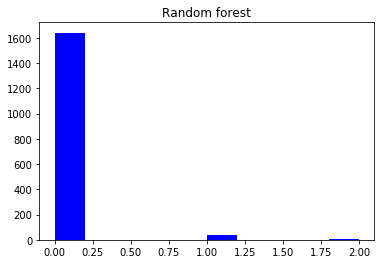

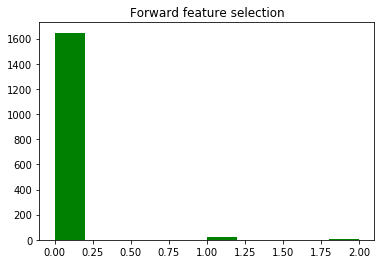

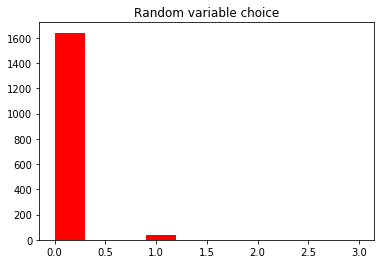

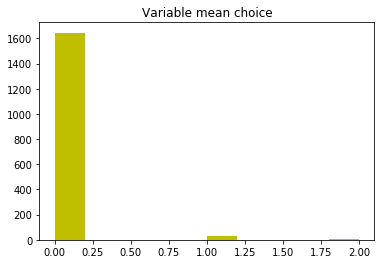

In [25]:
for name, color in zip(metric_names, ['b','g','r','y']):
    plt.hist(results[name], color=color)
    plt.title(name)
    plt.show()

<BarContainer object of 4 artists>

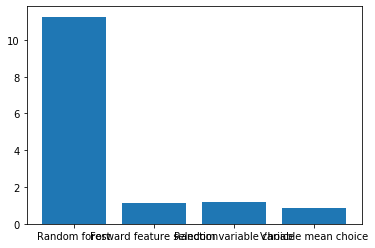

In [19]:
plt.bar(times.keys(), times.values())

<BarContainer object of 4 artists>

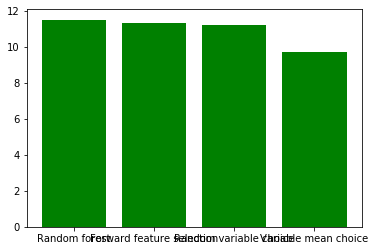

In [18]:
plt.bar(question_counts.keys(), question_counts.values(), color='g')